In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)
df['Geography'].replace({'France':0, 'Spain':1, 'Germany':2}, inplace = True)

In [5]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df1=df.copy()

In [7]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaling_column = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# df[scaling_column] = scaler.fit_transform(df[scaling_column])
# scaler=preprocessing.StandardScaler()
# df[scaling_column] = scaler.fit_transform(df[scaling_column])
# joblib.dump(scaler, "std_scaler.pkl")

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [9]:
import seaborn as sns
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [10]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
# import mlrose

**Classifiers**

In [11]:
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier 

In [12]:
import warnings
warnings.simplefilter('ignore')
from xgboost import XGBClassifier, plot_importance

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [15]:
X=df.drop("Exited",axis=1).to_numpy()
y=df['Exited'].to_numpy()

In [16]:
smote = SMOTE(sampling_strategy='minority')
X_data, y_data = smote.fit_resample(X, y)

In [17]:
X_data.shape

(15926, 10)

In [18]:
df2=pd.DataFrame(X_data,columns=["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"])

In [19]:
df2["Geography"].value_counts()

0.000000    6197
2.000000    3987
1.000000    2773
0.971529       1
0.670113       1
            ... 
0.148731       1
1.081209       1
1.901221       1
0.740303       1
0.604793       1
Name: Geography, Length: 2972, dtype: int64

In [20]:
df2.Geography=df2.Geography.round(0)

In [21]:
df2["Geography"].value_counts()

0.0    7066
2.0    4605
1.0    4255
Name: Geography, dtype: int64

In [22]:
df2["Gender"].value_counts()

0.000000    6613
1.000000    6425
0.482629       1
0.145213       1
0.085018       1
            ... 
0.353810       1
0.911365       1
0.534461       1
0.137778       1
0.706225       1
Name: Gender, Length: 2890, dtype: int64

In [23]:
df2.Gender=df2.Gender.round(0)

In [24]:
df2["Tenure"].value_counts()

1.000000    1128
2.000000    1111
8.000000    1094
5.000000    1087
3.000000    1065
            ... 
3.238960       1
2.601867       1
3.616263       1
8.575005       1
7.005212       1
Name: Tenure, Length: 5339, dtype: int64

In [25]:
df2.Tenure=df2.Tenure.round(0)

In [26]:
df2["Tenure"].value_counts()

4.0     1831
5.0     1818
3.0     1713
6.0     1701
7.0     1701
8.0     1620
2.0     1615
1.0     1450
9.0     1348
10.0     601
0.0      528
Name: Tenure, dtype: int64

In [27]:
df2["NumOfProducts"].value_counts()

1.000000    7908
2.000000    4794
3.000000     350
4.000000      65
1.315400       1
            ... 
1.168377       1
2.197415       1
2.877235       1
1.349540       1
1.329261       1
Name: NumOfProducts, Length: 2813, dtype: int64

In [28]:
df2.NumOfProducts=df2.NumOfProducts.round(0)

In [29]:
df2["NumOfProducts"].value_counts()

1.0    8827
2.0    6153
3.0     820
4.0     126
Name: NumOfProducts, dtype: int64

In [30]:
df2["HasCrCard"].value_counts()

1.000000    9967
0.000000    3484
0.691761       1
0.724696       1
0.564959       1
            ... 
0.598720       1
0.125532       1
0.974176       1
0.944897       1
0.452268       1
Name: HasCrCard, Length: 2477, dtype: int64

In [31]:
df2.HasCrCard=df2.HasCrCard.round(0)

In [32]:
df2["HasCrCard"].value_counts()

1.0    11198
0.0     4728
Name: HasCrCard, dtype: int64

In [88]:
df2["IsActiveMember"].value_counts()

0.000000    7332
1.000000    5906
0.722371       1
0.990034       1
0.240425       1
            ... 
0.682088       1
0.474070       1
0.508335       1
0.155278       1
0.788728       1
Name: IsActiveMember, Length: 2690, dtype: int64

In [33]:
df2.IsActiveMember=df2.IsActiveMember.round(0)

In [34]:
df2["IsActiveMember"].value_counts()

0.0    8659
1.0    7267
Name: IsActiveMember, dtype: int64

In [35]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.000000,0.0,1.0,42.000000,2.0,0.000000,1.0,1.0,1.0,101348.880000
1,608.000000,1.0,1.0,41.000000,1.0,83807.860000,1.0,0.0,1.0,112542.580000
2,502.000000,0.0,1.0,42.000000,8.0,159660.800000,3.0,1.0,0.0,113931.570000
3,699.000000,0.0,1.0,39.000000,1.0,0.000000,2.0,0.0,0.0,93826.630000
4,850.000000,1.0,1.0,43.000000,2.0,125510.820000,1.0,1.0,1.0,79084.100000
...,...,...,...,...,...,...,...,...,...,...
15921,615.398182,2.0,0.0,57.063026,1.0,122179.700724,1.0,0.0,1.0,85339.151620
15922,708.011852,0.0,1.0,49.000000,4.0,203812.272782,1.0,0.0,1.0,7941.654917
15923,604.000000,0.0,1.0,52.241299,2.0,121075.907868,1.0,1.0,1.0,48147.963159
15924,625.548479,2.0,1.0,42.685963,5.0,130979.980922,2.0,0.0,1.0,86033.141891


In [36]:
df3=pd.DataFrame(y_data,columns=["Exited"])

In [37]:
df3["Exited"].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [38]:
extra=df3["Exited"]

In [39]:
df2 = df2.join(extra)

In [40]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.000000,0.0,1.0,42.000000,2.0,0.000000,1.0,1.0,1.0,101348.880000,1
1,608.000000,1.0,1.0,41.000000,1.0,83807.860000,1.0,0.0,1.0,112542.580000,0
2,502.000000,0.0,1.0,42.000000,8.0,159660.800000,3.0,1.0,0.0,113931.570000,1
3,699.000000,0.0,1.0,39.000000,1.0,0.000000,2.0,0.0,0.0,93826.630000,0
4,850.000000,1.0,1.0,43.000000,2.0,125510.820000,1.0,1.0,1.0,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,615.398182,2.0,0.0,57.063026,1.0,122179.700724,1.0,0.0,1.0,85339.151620,1
15922,708.011852,0.0,1.0,49.000000,4.0,203812.272782,1.0,0.0,1.0,7941.654917,1
15923,604.000000,0.0,1.0,52.241299,2.0,121075.907868,1.0,1.0,1.0,48147.963159,1
15924,625.548479,2.0,1.0,42.685963,5.0,130979.980922,2.0,0.0,1.0,86033.141891,1


In [41]:
df_try=df2.copy()

In [42]:
X1=df_try.drop("Exited",axis=1).to_numpy()

In [44]:
y1=df_try["Exited"].to_numpy()

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20, random_state = 43)

In [47]:
print(X_test1[0],y_test1[0])

[4.960000e+02 0.000000e+00 0.000000e+00 3.100000e+01 5.000000e+00
 0.000000e+00 2.000000e+00 1.000000e+00 0.000000e+00 9.371313e+04] 0


In [63]:
X2=df2.drop("Exited",axis=1).to_numpy()

In [64]:
y2=df3["Exited"].to_numpy()

In [50]:
df2[scaling_column] = scaler.fit_transform(df2[scaling_column])


In [51]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538000,0.0,1.0,0.324324,0.2,0.000000,1.0,1.0,1.0,0.506735,1
1,0.516000,1.0,1.0,0.310811,0.1,0.334031,1.0,0.0,1.0,0.562709,0
2,0.304000,0.0,1.0,0.324324,0.8,0.636357,3.0,1.0,0.0,0.569654,1
3,0.698000,0.0,1.0,0.283784,0.1,0.000000,2.0,0.0,0.0,0.469120,0
4,1.000000,1.0,1.0,0.337838,0.2,0.500246,1.0,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,0.530796,2.0,0.0,0.527879,0.1,0.486969,1.0,0.0,1.0,0.426679,1
15922,0.716024,0.0,1.0,0.418919,0.4,0.812331,1.0,0.0,1.0,0.039654,1
15923,0.508000,0.0,1.0,0.462720,0.2,0.482570,1.0,1.0,1.0,0.240705,1
15924,0.551097,2.0,1.0,0.333594,0.5,0.522045,2.0,0.0,1.0,0.430149,1


In [65]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.20, random_state = 43)

In [66]:


# Initializing Multi-layer perceptron  classifier
classifier1 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10), learning_rate = "constant", max_iter = 2000, random_state = 1000)

classifier2 = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

In [67]:
sclf = StackingCVClassifier(classifiers = [ classifier1,classifier2],
                            shuffle = True,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = XGBClassifier(probability = True))

In [68]:
# Create list to store classifiers
classifiers = { 
               "ANN": classifier1,
               "XGB": classifier2,
               "Stack": sclf}

In [69]:
c=0
for key in classifiers:
    # Get classifier
    print(c)

    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train3, y_train3)
        
    # Save fitted classifier
    classifiers[key] = classifier
    c+=1

0
1
2


In [70]:
X_test3

array([[0.292     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.4685525 ],
       [0.956     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19061915],
       [0.51713092, 2.        , 0.        , ..., 0.        , 0.        ,
        0.00449217],
       ...,
       [0.358     , 1.        , 0.        , ..., 1.        , 1.        ,
        0.93647403],
       [0.72      , 0.        , 1.        , ..., 1.        , 1.        ,
        0.56144102],
       [0.86      , 2.        , 0.        , ..., 1.        , 1.        ,
        0.6125345 ]])

In [74]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    # print(classifiers[key].predict_proba(X_test3))
    y_pred = classifiers[key].predict_proba(X_test3)[:,1]
    # print(y_pred)
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test3

[[0.96316539 0.03683461]
 [0.81044571 0.18955429]
 [0.07191442 0.92808558]
 ...
 [0.96180453 0.03819547]
 [0.95310718 0.04689282]
 [0.64926847 0.35073153]]
[0.03683461 0.18955429 0.92808558 ... 0.03819547 0.04689282 0.35073153]
[[0.9896504  0.01034959]
 [0.96532786 0.03467215]
 [0.01714319 0.9828568 ]
 ...
 [0.98816293 0.01183705]
 [0.9726095  0.02739047]
 [0.8953377  0.1046623 ]]
[0.01034959 0.03467215 0.9828568  ... 0.01183705 0.02739047 0.1046623 ]
[[0.99102813 0.00897184]
 [0.9722079  0.02779212]
 [0.00756484 0.99243516]
 ...
 [0.9887079  0.01129213]
 [0.9819167  0.01808325]
 [0.89965594 0.10034408]]
[0.00897184 0.02779212 0.99243516 ... 0.01129213 0.01808325 0.10034408]


In [108]:
result1=results.copy()

In [109]:
result1

,ANN,XGB,Stack,Target
0,0.058380,0.018438,0.021101,0
1,0.253186,0.011816,0.009899,0
2,0.816157,0.989766,0.999477,1
3,0.378895,0.110966,0.128710,1
4,0.603148,0.260613,0.224313,0
...,...,...,...,...
3181,0.122298,0.024798,0.025419,0
3182,0.641008,0.990611,0.999608,1
3183,0.067541,0.020094,0.021101,0
3184,0.083552,0.077032,0.063288,0


In [110]:
def func1(text):
  if text >= 0.5:
    return 1
  else:
    return 0

  


In [111]:
result1['Stack'] = result1['Stack'].apply(func1)

In [112]:
result1['XGB'] = result1['XGB'].apply(func1)

In [113]:
result1['ANN'] = result1['ANN'].apply(func1)

In [114]:
result1

,ANN,XGB,Stack,Target
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
3181,0,0,0,0
3182,1,1,1,1
3183,0,0,0,0
3184,0,0,0,0


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

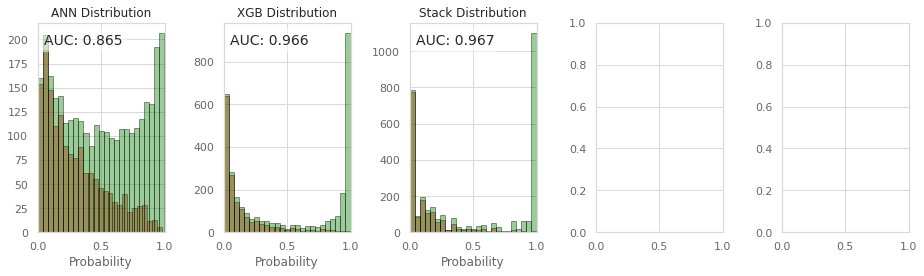

In [116]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test3, y_pred)
    # print(accuracy_score(y_pred,y_test))
    # auc=accuracy_score(y_pred,y_test)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

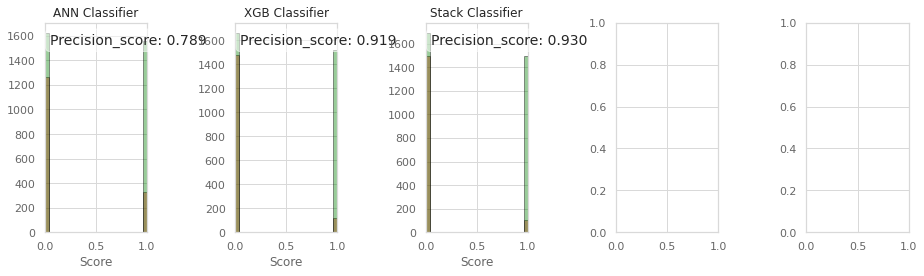

In [123]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = result1[key]
    # print(y_pred)
    # print(key)
    # Get AUC
    # auc = metrics.roc_auc_score(y_test, y_pred)
    auc=metrics.precision_score(y_test3,y_pred)
    # print(accuracy_score(y_pred,y_test))
    # auc=accuracy_score(y_pred,y_test)
    textstr = f"Precision_score: {auc:.3f}"

    # Plot false distribution
    false_pred = result1[result1["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = result1[result1["Target"] == 1]
    sns.distplot(result1[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Classifier")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Score")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Precision score Distribution for each Classifier.png", dpi = 1080)

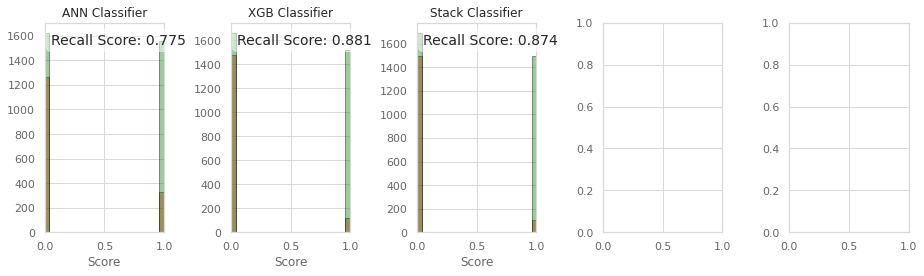

In [124]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = result1[key]
    # print(y_pred)
    # print(key)
    # Get AUC
    # auc = metrics.roc_auc_score(y_test, y_pred)
    auc=metrics.recall_score(y_test3,y_pred)
    # print(accuracy_score(y_pred,y_test))
    # auc=accuracy_score(y_pred,y_test)
    textstr = f"Recall Score: {auc:.3f}"

    # Plot false distribution
    false_pred = result1[result1["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = result1[result1["Target"] == 1]
    sns.distplot(result1[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Classifier")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Score")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Recall score Distribution for each Classifier.png", dpi = 1080)

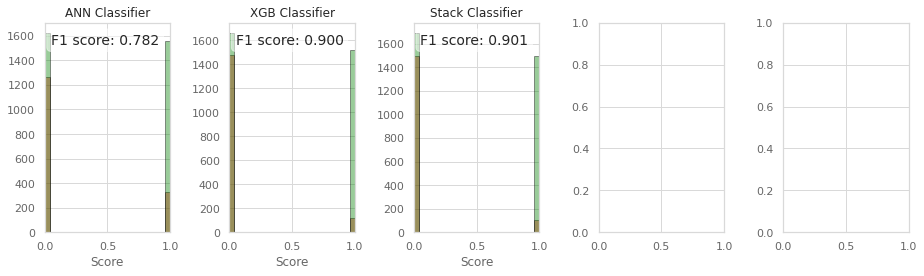

In [125]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = result1[key]
    # print(y_pred)
    # print(key)
    # Get AUC
    # auc = metrics.roc_auc_score(y_test, y_pred)
    auc=metrics.f1_score(y_test3,y_pred)
    # print(accuracy_score(y_pred,y_test))
    # auc=accuracy_score(y_pred,y_test)
    textstr = f"F1 score: {auc:.3f}"

    # Plot false distribution
    false_pred = result1[result1["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = result1[result1["Target"] == 1]
    sns.distplot(result1[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Classifier")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Score")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("F1 score Distribution for each Classifier.png", dpi = 1080)

In [120]:
import pickle

In [121]:
filename = 'finalized_model.pkl'
pickle.dump(classifiers["Stack"], open(filename, 'wb'))

In [122]:
joblib.dump(scaler, "std_scaler.pkl")

['std_scaler.pkl']